# IRIS CLASSIFIER

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score, accuracy_score
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Skewness Treatment

In [9]:
fitted_data, fitted_lambda = stats.boxcox(df['SepalLengthCm'])

In [10]:
fitted_data = fitted_data.reshape(150,-1)
df['SepalLengthCm'] = fitted_data

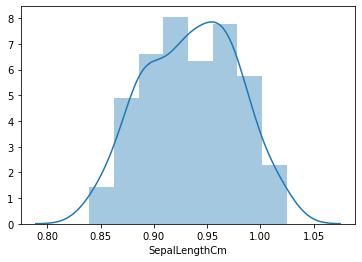

In [11]:
sns.distplot(np.log1p(df['SepalLengthCm']))


In [13]:
df['SepalLengthCm'] = np.log1p(df['SepalLengthCm'])

In [15]:
fitted_data, fitted_lambda = stats.boxcox(df['SepalWidthCm'])

In [16]:
fitted_data = fitted_data.reshape(150,-1)
df['SepalWidthCm'] = fitted_data

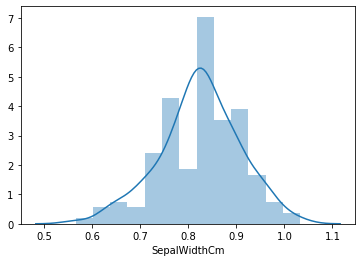

In [17]:
sns.distplot(np.log1p(df['SepalWidthCm']))


In [18]:
df['SepalWidthCm'] = np.log1p(df['SepalWidthCm'])

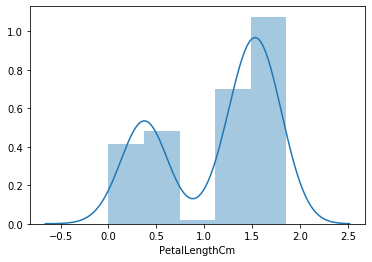

In [19]:
fitted_data, fitted_lambda = stats.boxcox(df['PetalLengthCm'])
fitted_data = fitted_data.reshape(150,-1)
df['PetalLengthCm'] = fitted_data
df['PetalLengthCm'] = np.log1p(df['PetalLengthCm'])
sns.distplot(df['PetalLengthCm'])

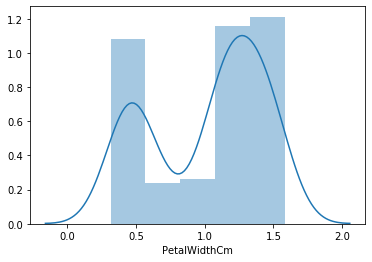

In [20]:
df['PetalWidthCm']=np.sqrt(df['PetalWidthCm'])
sns.distplot(df['PetalWidthCm'])

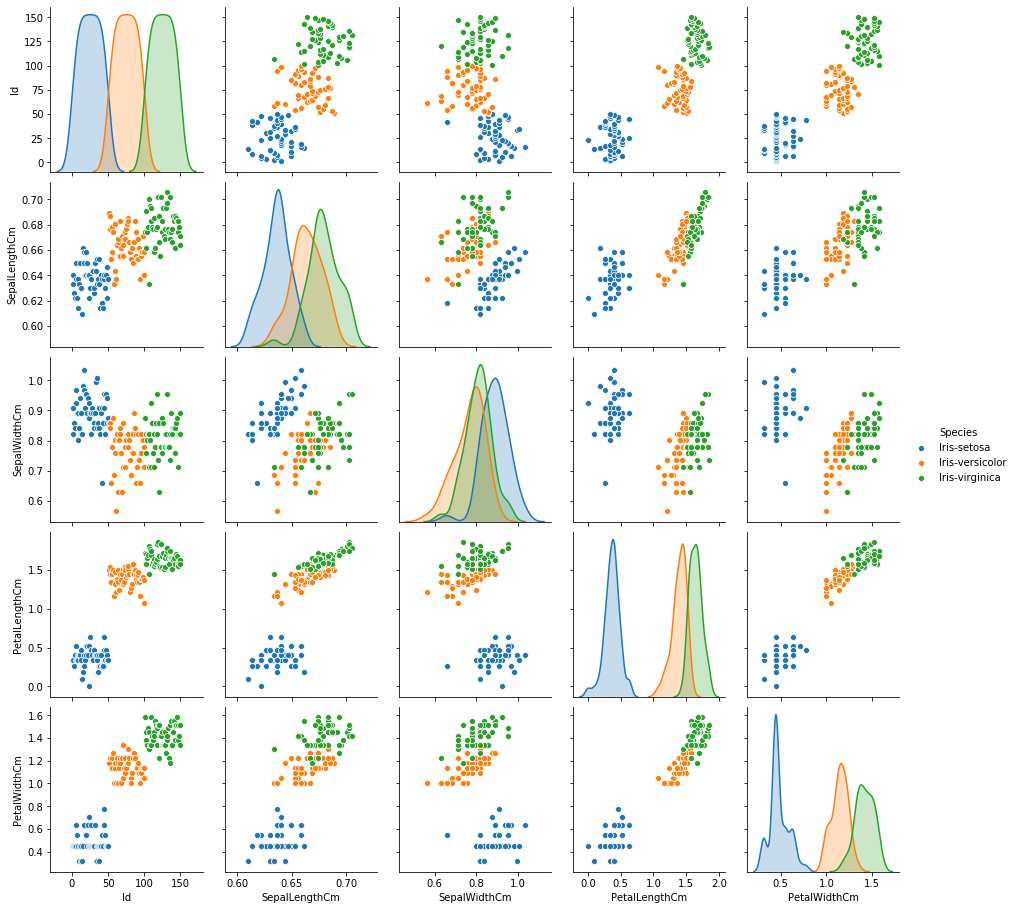

In [21]:
sns.pairplot(df,hue='Species')

# Inference
1. We can observe most of the quantities exhibit positive correlation.
2. However, SepalLength and SepalWidth show no particular relation between them, we can infer that they are independent of each other.

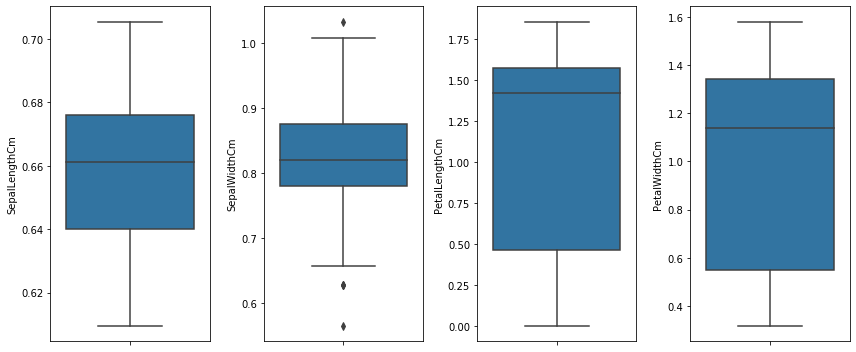

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
sns.boxplot(df['SepalLengthCm'],orient='v')
plt.subplot(1,4,2)
sns.boxplot(df['SepalWidthCm'],orient='v')
plt.subplot(1,4,3)
sns.boxplot(df['PetalLengthCm'],orient='v')
plt.subplot(1,4,4)
sns.boxplot(df['PetalWidthCm'],orient='v')
plt.tight_layout()

# Inference
1. We can observe few outliers in the SepalWidth.
2. The mean of all the features have been made close to 0, to achieve standardisation since Kmeans clustering is an distance dependent approach.

In [81]:
x = df.drop(['Species','Id'],axis=1)
y = pd.DataFrame(df['Species'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [84]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [85]:
#checking the training score
dt_model.score(x_train, y_train)

1.0

In [86]:
dt_model.score(x_test, y_test)
y_train

,Species
136,Iris-virginica
17,Iris-setosa
142,Iris-virginica
59,Iris-versicolor
6,Iris-setosa
...,...
49,Iris-setosa
86,Iris-versicolor
45,Iris-setosa
60,Iris-versicolor


In [87]:
#predictions on validation set
pred_train = dt_model.predict(x_train)
pred_train = pd.DataFrame(pred_train, columns=['Species'])

In [88]:
# dt_model.predict_proba(x_test)

In [89]:
f1 = f1_score(y_train,pred_train,average='macro')
a = accuracy_score(y_train,pred_train)
print('F1 Score for Training Data = ',f1)
print('Accuracy Score for Training Data = ',a)

F1 Score for Training Data =  1.0
Accuracy Score for Training Data =  1.0


In [90]:
pred_test = dt_model.predict(x_test)
pred_test = pd.DataFrame(pred_test, columns=['Species'])

In [91]:
f1 = f1_score(y_test,pred_test,average='macro')
a = accuracy_score(y_test,pred_test)
print('F1 Score for Testing Data = ',f1)
print('Accuracy Score for Testing Data = ',a)

F1 Score for Testing Data =  0.9607843137254902
Accuracy Score for Testing Data =  0.96


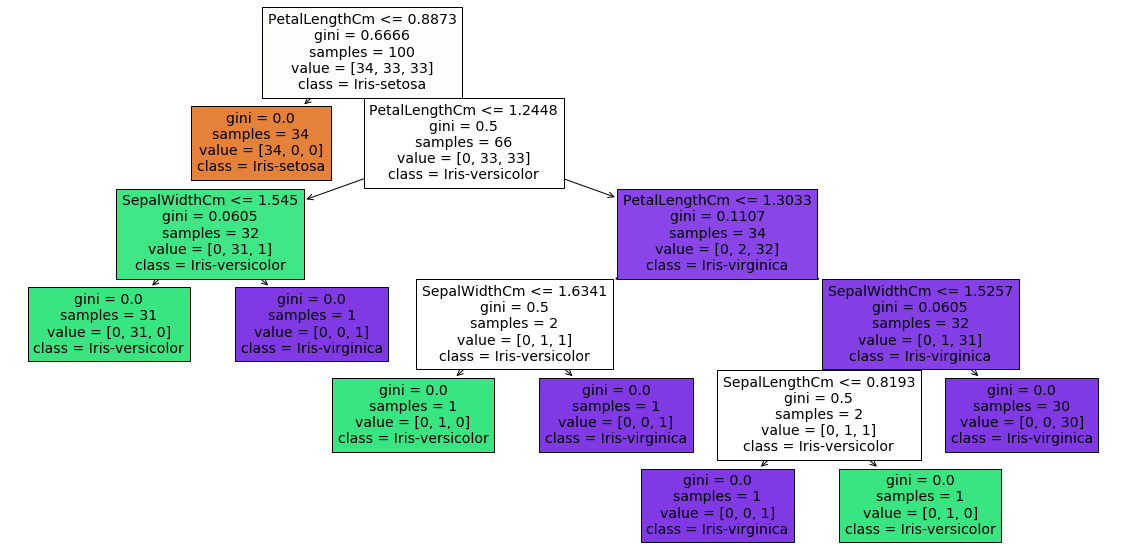

In [92]:
plt.figure(figsize=(20,10))
tree_img=plot_tree(dt_model,feature_names=df.columns,class_names=df['Species'].unique().tolist(),precision=4,label="all",filled=True)
plt.show()

In [93]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
136,0.673739,0.892983,1.661677,1.549193
17,0.640089,0.909260,0.333006,0.547723
142,0.661084,0.758123,1.573301,1.378405
59,0.643368,0.758123,1.319117,1.183216
6,0.621961,0.892983,0.333006,0.547723
...,...,...,...,...
49,0.636704,0.876071,0.333006,0.447214
86,0.682767,0.840141,1.496025,1.224745
45,0.629586,0.821011,0.333006,0.547723
60,0.636704,0.565304,1.216245,1.000000


In [112]:
dt_model.predict([[0.673739,0.892983,1.661677,1.54919]])[0]

'Iris-virginica'

http://127.0.0.1:8050/

In [115]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash_table.Format import Format, Group, Scheme, Symbol
import dash_bootstrap_components as dbc

image_bg = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//DTA//assets//bg.jpg'
encoded_bg = base64.b64encode(open(image_bg, 'rb').read())

versicolor = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//DTA//assets//iris_versicolor.jpg'
encoded_ver = base64.b64encode(open(versicolor, 'rb').read())

setosa = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//DTA//assets//iris_setosa.jpg'
encoded_set = base64.b64encode(open(setosa, 'rb').read())

virginica = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//DTA//assets//iris_virginica.jpg'
encoded_vir = base64.b64encode(open(virginica, 'rb').read())


app = dash.Dash(external_stylesheets=[dbc.themes.SLATE])
app.layout = html.Div([
    html.H1('Iris Flower Classifier :',className='text-field-title'),
    dbc.Input(id="SepalLengthCm", placeholder="Enter Sepal Length(cm)", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Input(id="SepalWidthCm", placeholder="Enter Sepal Width(cm)", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Input(id="PetalLengthCm", placeholder="Enter Petal Length(cm)", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Input(id="PetalWidthCm", placeholder="Enter Petal Width(cm)", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Button("Classify", id='calculate',color="success",size="lg",n_clicks=0,className = "home-button"),
    html.Div(id='species'),
    
    html.Div( children=[
    html.Img(className='bg',src='data:image/png;base64,{}'.format(encoded_bg.decode())) ])
    
])

@app.callback(Output('species', 'children'),
              [Input('calculate', 'n_clicks')],
              [State('SepalLengthCm', 'value'),State('SepalWidthCm', 'value'),State('PetalLengthCm', 'value'),State('PetalWidthCm', 'value')])

              
def success(n_clicks,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm):
    if n_clicks > 0:
        species = dt_model.predict([[float(SepalLengthCm),  float(SepalWidthCm),  float(PetalLengthCm),  float(PetalWidthCm)]])[0]
        if species == 'Iris-virginica':
            return  html.H3(species), html.Img(src='data:image/png;base64,{}'.format(encoded_vir.decode()))
        elif species == 'Iris-setosa':
            return html.H3(species), html.Img(src='data:image/png;base64,{}'.format(encoded_set.decode()))
        else:
            return html.H3(species), html.Img(src='data:image/png;base64,{}'.format(encoded_ver.decode()))
        
    
    
    
if __name__ == '__main__':
    app.run_server(debug=False)



Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Aug/2020 23:45:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:45:52] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:45:52] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:45:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:19] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:46:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:47:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 23:48:17] "POST /_dash-update-component